In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

In [2]:
# create GEKKO model
m = GEKKO()

In [110]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()

nt = 101
tm = np.linspace(0,1,nt)
m.time = tm

distance = 1000

# constants
sm = 39.0 #maximal VO2
e0 = 2200 #starting level of energy
e_crit = 0.15 * e0 #critical level of energy, when sigma decreases
g = 9.81 #gravitational constant

# sigma data to create spline
E_data = np.linspace(0, e0, 1001)
sigma_data = sm * E_data/(e0 * e_crit) + 0.75 * sm * (1 - E_data/(e0 * e_crit))
sigma_data[E_data > e_crit] = sm

# sigma data to create spline
x_data = np.linspace(0, distance, 500)
slope_data = np.array(250*[1/18 * np.pi] + 250 * [-1/18 * np.pi])

# Variables
v = m.Var(value=0.0, lb=0.0, ub=10.0)
E = m.Var(value=E0, lb=0.0)
x = m.Var(value=0.0)
sigma = m.Var(value=sm, lb=0)
sigma_max = m.Var()
slope = m.Var(value=slope_data[0])

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# FV
tf = m.FV(value=150.0,lb=0.1,ub=300.0)
tf.STATUS = 1

# MV
u = m.MV(value=0,lb=0,ub=12)
u.STATUS = 1

# energy decrease at the end
m.cspline(E, sigma_max, E_data, sigma_data, True)

# slope
m.cspline(x, slope, x_data, slope_data, True)

m.Equation(v.dt()==(u - g * m.sin(slope) - v/0.892)*tf)
m.Equation(E.dt()==(sigma - u*v)*tf)
m.Equation(x.dt()==v*tf)
m.Equation(sigma<=sigma_max)

m.Equation((distance-x)*final<=0)

m.Minimize(tf)

m.options.IMODE = 6
m.options.MAX_ITER=1000
m.solve()

print('Final Time: ' + str(tf.value[0]))

tm = tm * tf.value[0]

apm 90.156.80.122_gk_model50 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            2
   Constants    :            0
   Variables    :           11
   Intermediates:            0
   Connections  :            4
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           1601
 Number of total equations: -         1400
 Number of slack variables: -          200
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

In iteration 60, 1 Slack too small, adjusting variable bound
  61  2.1124238e+04 2.23e+01 9.66e+10  -5.4 1.07e-01  12.0 1.00e+00 1.00e+00h  1
In iteration 61, 1 Slack too small, adjusting variable bound
  62  2.1124061e+04 1.48e+01 1.31e+11  -6.8 3.24e-01  11.5 1.00e+00 1.00e+00H  1
In iteration 62, 1 Slack too small, adjusting variable bound
  63  2.1121567e+04 1.43e+01 1.95e+11  -8.1 1.95e+00  11.0 1.00e+00 1.00e+00h  1
In iteration 63, 1 Slack too small, adjusting variable bound
  64  2.1124017e+04 5.31e+00 2.51e+11  -9.3 7.51e+00  10.5 1.00e+00 1.00e+00h  1
In iteration 64, 100 Slacks too small, adjusting variable bounds
  65  2.1111339e+04 6.00e+00 1.26e+11 -10.6 1.13e+01  10.0 1.00e+00 1.00e+00h  1
In iteration 65, 1 Slack too small, adjusting variable bound
  66  2.1105342e+04 3.08e+00 1.08e+10  -9.3 2.92e+00   9.6 1.00e+00 1.00e+00h  1
In iteration 66, 1 Slack too small, adjusting variable bound
  67  2.1131944e+04 9.52e-01 4.18e+09 -10.2 3.39e+00   9.1 1.00e+00 1.00e+00h  1
In

In iteration 118, 1 Slack too small, adjusting variable bound
 119  1.7104164e+04 2.24e+01 4.22e+03  -2.6 9.06e+00   1.2 1.00e+00 2.01e-01h  1
In iteration 119, 1 Slack too small, adjusting variable bound
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  1.7140693e+04 8.50e+00 2.09e+04  -2.0 2.24e+01   1.6 1.00e+00 1.00e+00h  1
In iteration 120, 1 Slack too small, adjusting variable bound
 121  1.7132986e+04 6.46e-01 9.85e+02  -2.5 8.50e+00   1.1 1.00e+00 1.00e+00h  1
In iteration 121, 1 Slack too small, adjusting variable bound
 122  1.7134657e+04 1.17e-03 5.62e+02  -3.6 6.10e-02   1.5 1.00e+00 1.00e+00H  1
In iteration 122, 1 Slack too small, adjusting variable bound
 123  1.7134459e+04 5.99e-04 4.98e+01  -5.7 1.64e-02   1.1 1.00e+00 1.00e+00h  1
In iteration 123, 1 Slack too small, adjusting variable bound
 124  1.7134142e+04 7.92e-05 3.66e-01  -7.8 1.39e-02   0.6 1.00e+00 1.00e+00h  1
In iteration 124, 1 Slack too small, adjusting variable bound

 197  1.4727356e+04 4.22e-04 4.18e-04  -6.1 2.11e-01  -3.8 1.00e+00 1.00e+00h  1
 198  1.4727321e+04 5.51e-03 1.85e-02  -6.1 7.78e-01  -4.3 1.00e+00 1.00e+00h  1
 199  1.4727306e+04 8.12e-04 3.05e-03  -6.1 2.99e-01  -3.8 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  1.4727260e+04 1.05e-02 7.03e-02  -6.1 1.09e+00  -4.3 1.00e+00 1.00e+00h  1
 201  1.4727113e+04 9.22e-02 2.94e-01  -6.1 3.25e+00  -4.8 1.00e+00 1.00e+00h  1
 202  1.4726712e+04 9.14e-01 2.85e-01  -6.1 4.63e+01    -  1.00e+00 2.26e-01h  1
 203  1.4726601e+04 2.34e-01 4.32e-02  -6.1 5.09e+00  -5.3 1.00e+00 1.00e+00h  1
 204  1.4725835e+04 8.70e+00 4.82e-02  -6.1 3.26e+01    -  1.00e+00 1.00e+00h  1
 205  1.4726204e+04 4.51e-02 9.20e-04  -6.1 4.66e+00    -  1.00e+00 1.00e+00h  1
 206  1.4726208e+04 5.17e-05 8.93e-06  -6.1 1.10e-01    -  1.00e+00 1.00e+00h  1
 207  1.4726161e+04 1.00e-05 2.36e-01  -6.9 1.80e+01    -  9.97e-01 9.93e-01h  1
 208  1.4726154e+04 2.76e-06

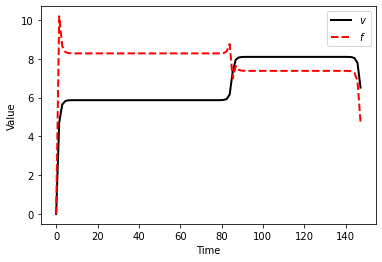

In [111]:
plt.figure(1)
plt.plot(tm,v.value,'k-',lw=2,label=r'$v$')
plt.plot(tm,u.value,'r--',lw=2,label=r'$f$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()